# Data Visualisation Lab 5 & 6

### Yash Maniya (B20CS033)

In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
sns.set_style('whitegrid')

### **1. Pattern Analysis in Iris**

In [69]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target_names[iris.target]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


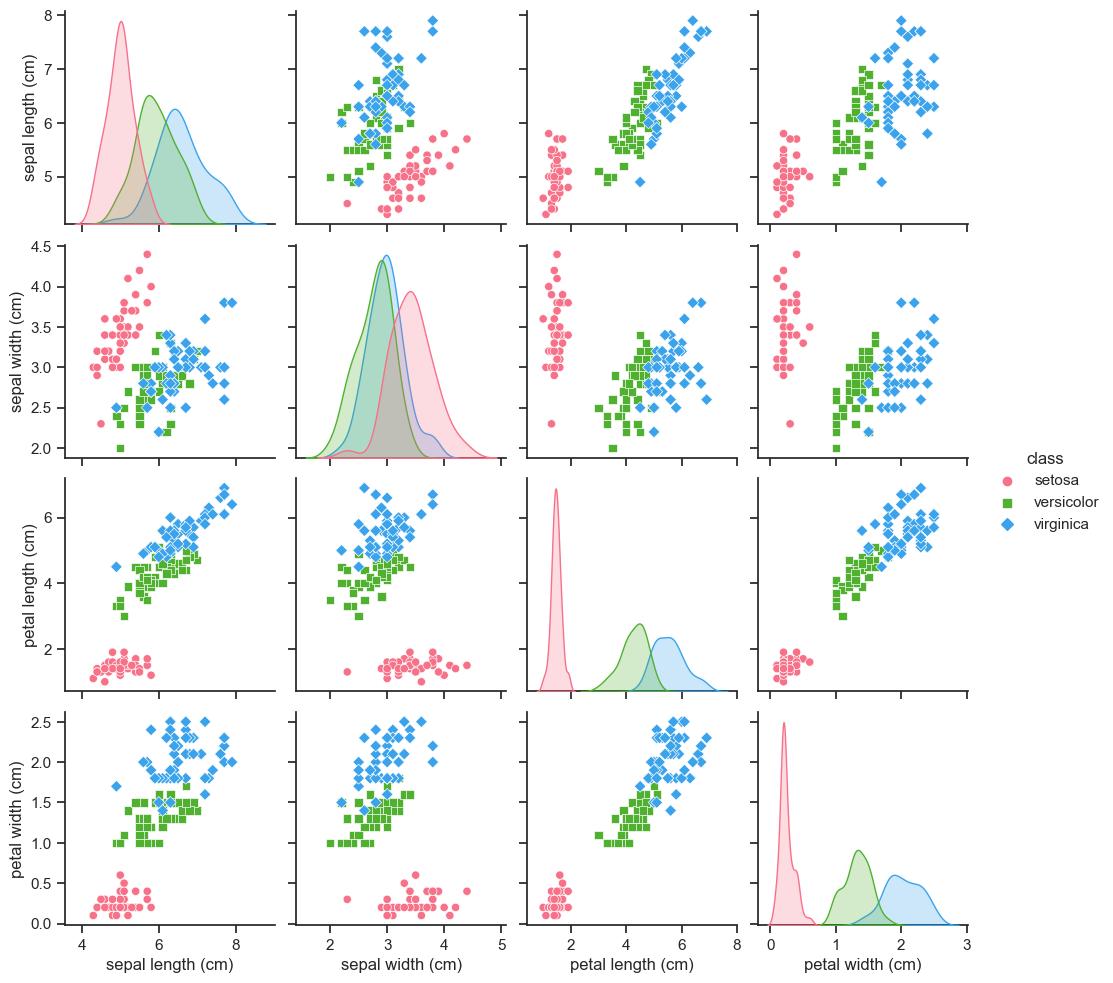

In [65]:
sns.set(style="ticks")
sns.pairplot(iris_df, hue="class", markers=["o", "s", "D"], palette="husl")
plt.show()

### **2. Linear Separability in Iris**

From the above pair plots (petal length and petal width rows from above plot), we can deduce that **Setosa is linearly separable** from other two classes.

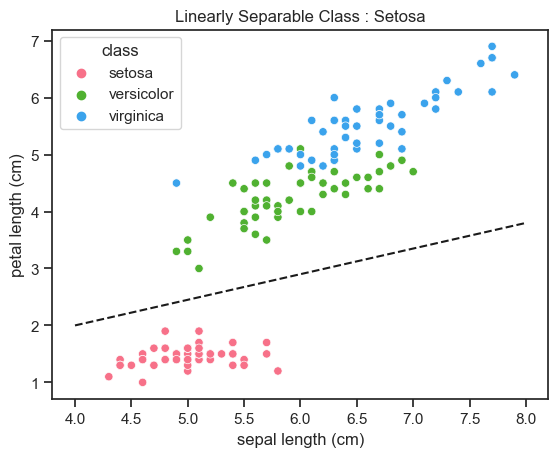

In [66]:
linearly_separable_features = ['sepal length (cm)', 'petal length (cm)']

plt.plot([4, 8], [2, 3.8], 'k--')
sns.scatterplot(data=iris_df, x=linearly_separable_features[0], y=linearly_separable_features[1], hue="class", palette="husl", markers=["o", "s", "D"])
plt.title("Linearly Separable Class : Setosa")
plt.xlabel(linearly_separable_features[0])
plt.ylabel(linearly_separable_features[1])
plt.show()


### **3. Exploratory data analysis of Wine Quality Data**

In [67]:
file_path = "./WineQT.csv"
wine_data = pd.read_csv(file_path)

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#### **Basic Statistics**

In [68]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


#### **Pair Plot**

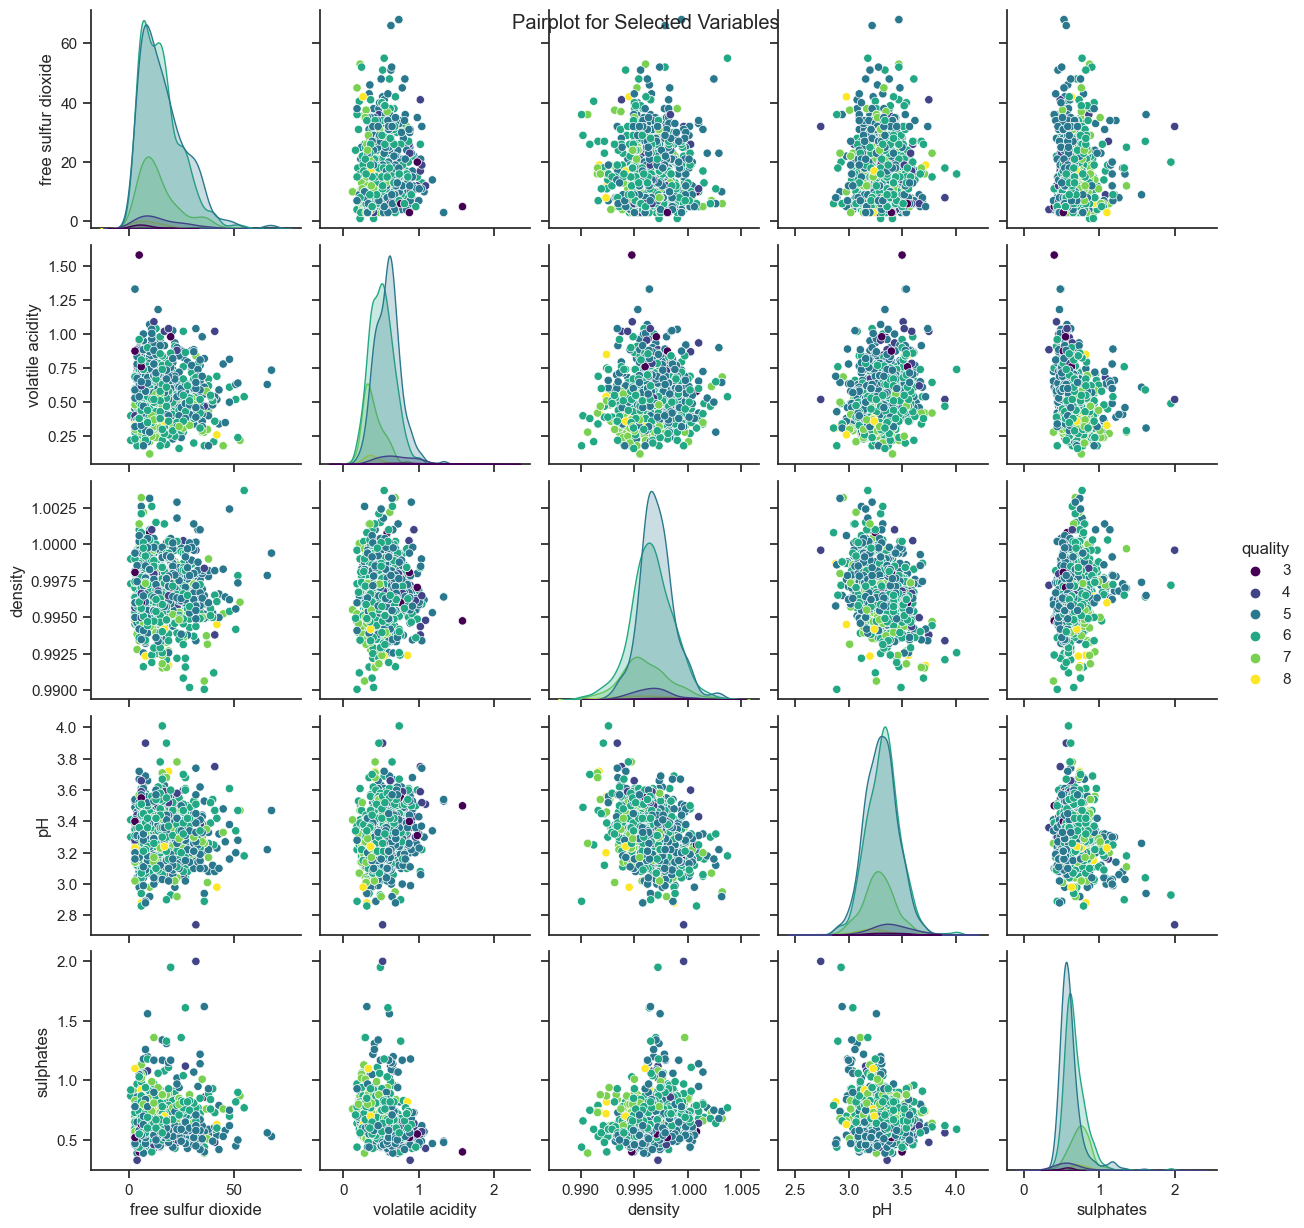

In [89]:
sns.pairplot(wine_data, vars=['free sulfur dioxide', 'volatile acidity', 'density', 'pH', 'sulphates'],
             hue='quality', palette='viridis')
plt.suptitle("Pairplot for Selected Variables")
plt.show()

#### **Correlation Matrix**

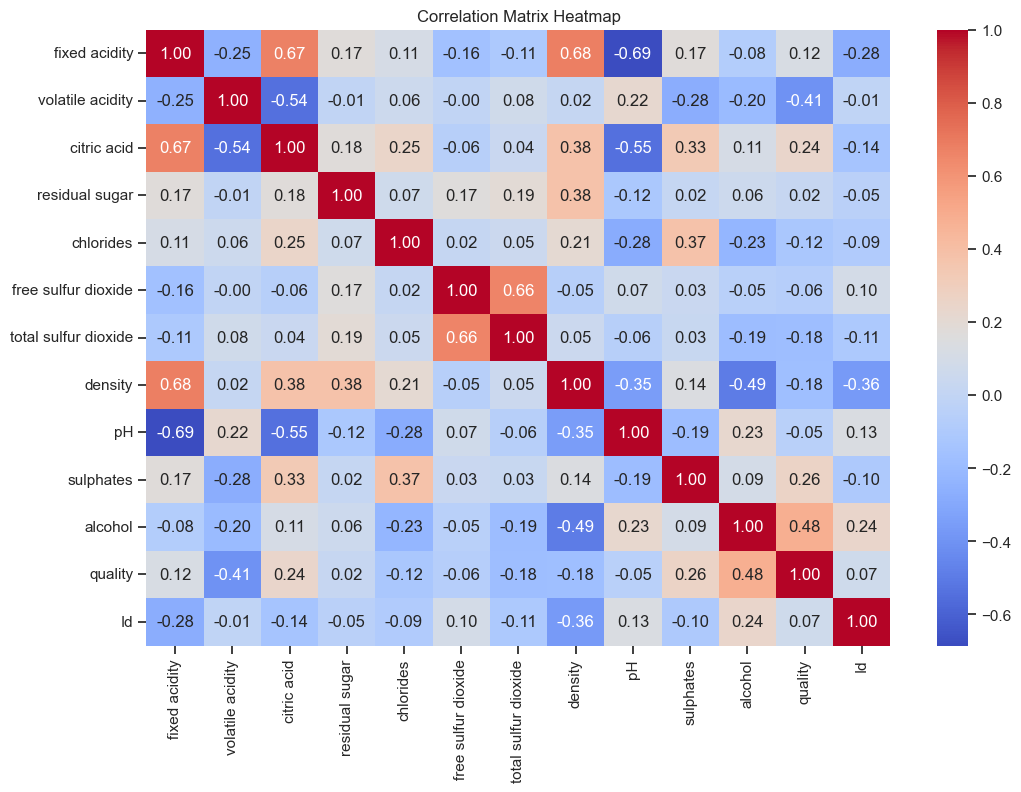

In [72]:
correlation_matrix = wine_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Based on the provided correlation matrix, here are three important insights:

1. **Density and Fixed Acidity [0.68] :**
   - The correlation coefficient between density and fixed acidity is 0.6815, indicating a strong positive correlation. As the density of the wine increases, so does the fixed acidity. This suggests that wines with higher fixed acidity tend to have higher density.

2. **pH and Fixed Acidity [-0.685]:**
   - There is a strong negative correlation (-0.6852) between pH and fixed acidity. This implies that as the pH of the wine decreases (i.e., becomes more acidic), the fixed acidity tends to increase. Understanding this relationship is crucial for winemakers to manage the acidity levels in their products.

3. **Alcohol Content and Quality [0.48]:**
   - The correlation coefficient between alcohol and quality is 0.4849, indicating a moderate positive correlation. Wines with higher alcohol content are more likely to have higher quality ratings. This insight can be valuable for producers aiming to enhance wine quality by adjusting alcohol levels during the winemaking process.

#### **Feature-wise Distributions**

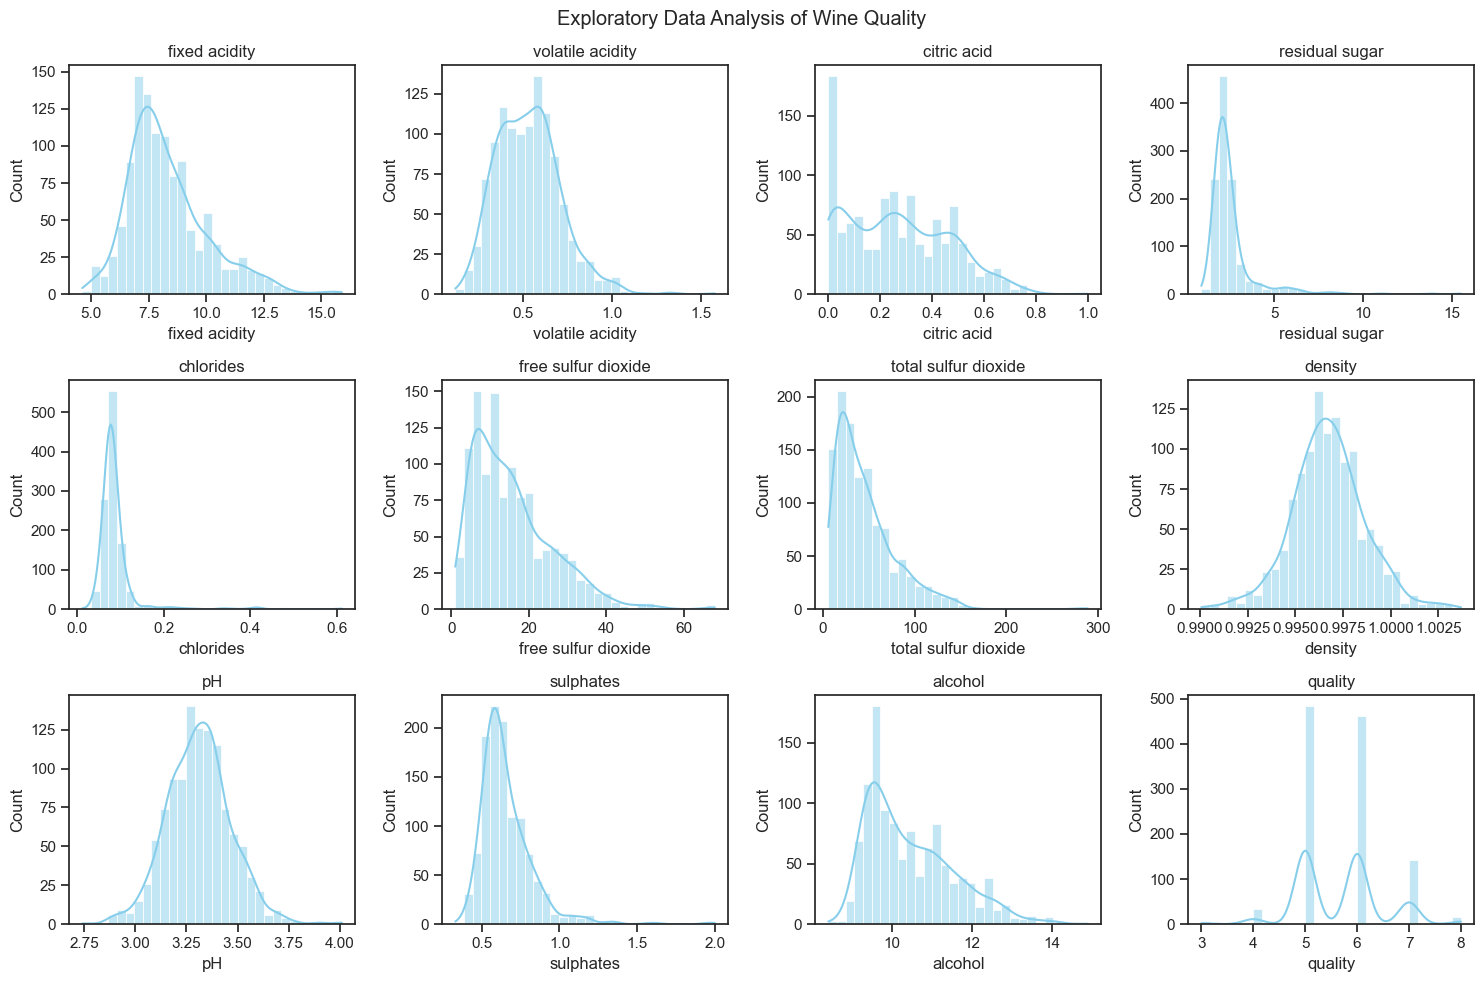

In [100]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Exploratory Data Analysis of Wine Quality')

for i, col in enumerate(wine_data.columns[:-1]):
    sns.histplot(wine_data[col], kde=True, ax=axes[i//4, i%4], color='skyblue', bins=30)
    axes[i//4, i%4].set_title(col)

plt.tight_layout()

#### **Wine Quality Distribution**

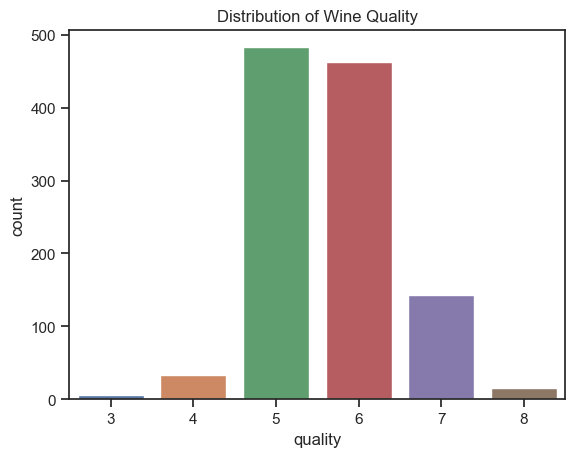

In [85]:
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.show()

We see that Quality of 5-7 is common whereas low quality and high quality wines are rare.

#### **Alcohol Content Analysis**

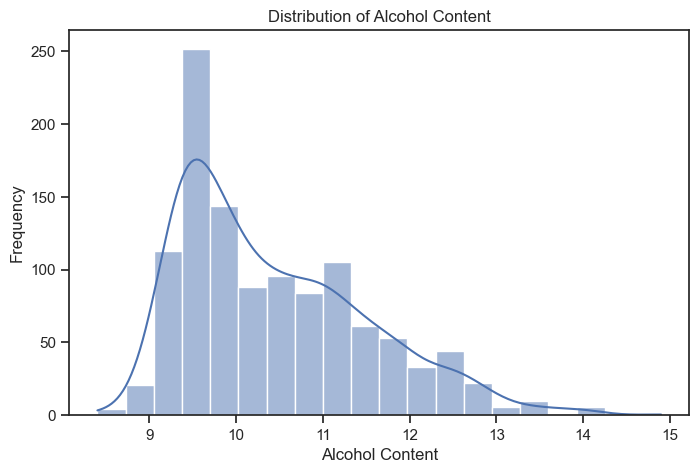

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(wine_data['alcohol'], bins=20, kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

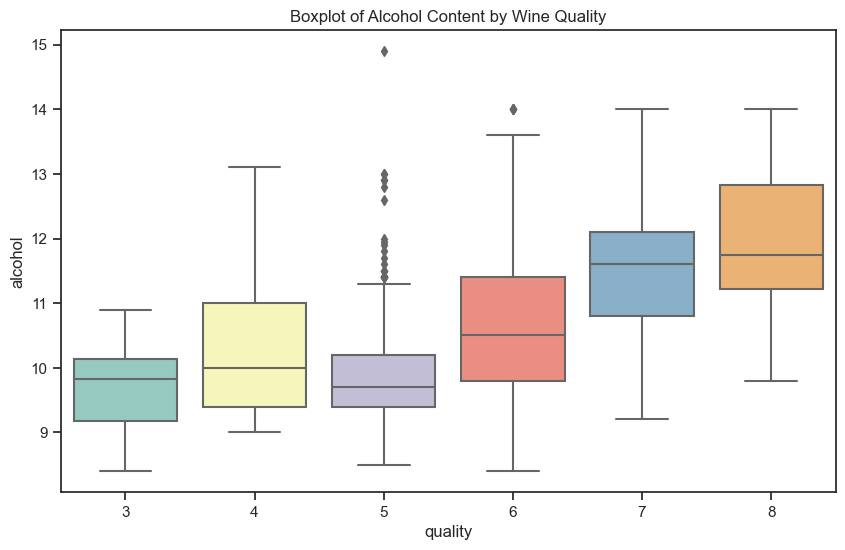

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='Set3')
plt.title("Boxplot of Alcohol Content by Wine Quality")
plt.show()

- We see that wines with higher quality tend to have higher alcohol contents.
- Also Wine quality 5 has most outliers maybe due to intrinsic properties of overall contents.

#### **Violin Plot for pH Distribution Analysis**

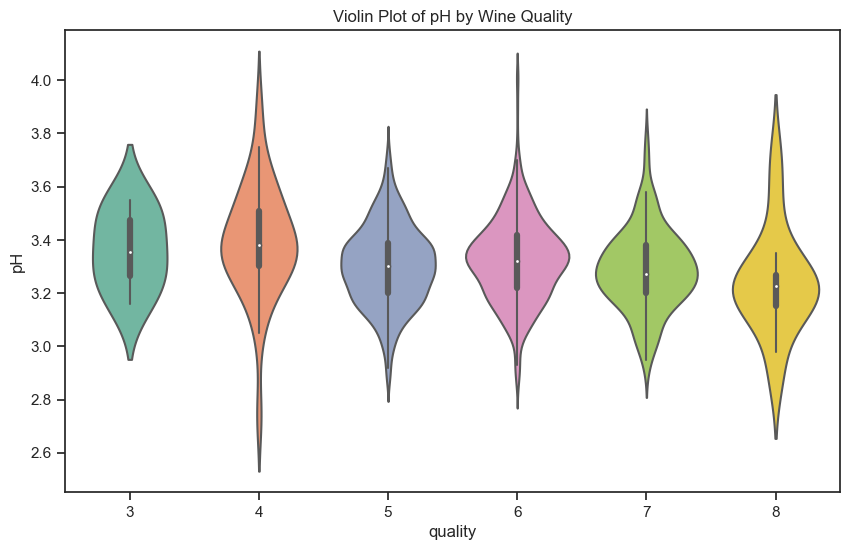

In [74]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='pH', data=wine_data, palette='Set2')
plt.title("Violin Plot of pH by Wine Quality")
plt.show()

c:\Users\YASH MANIYA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Box Plots of Wine Features')

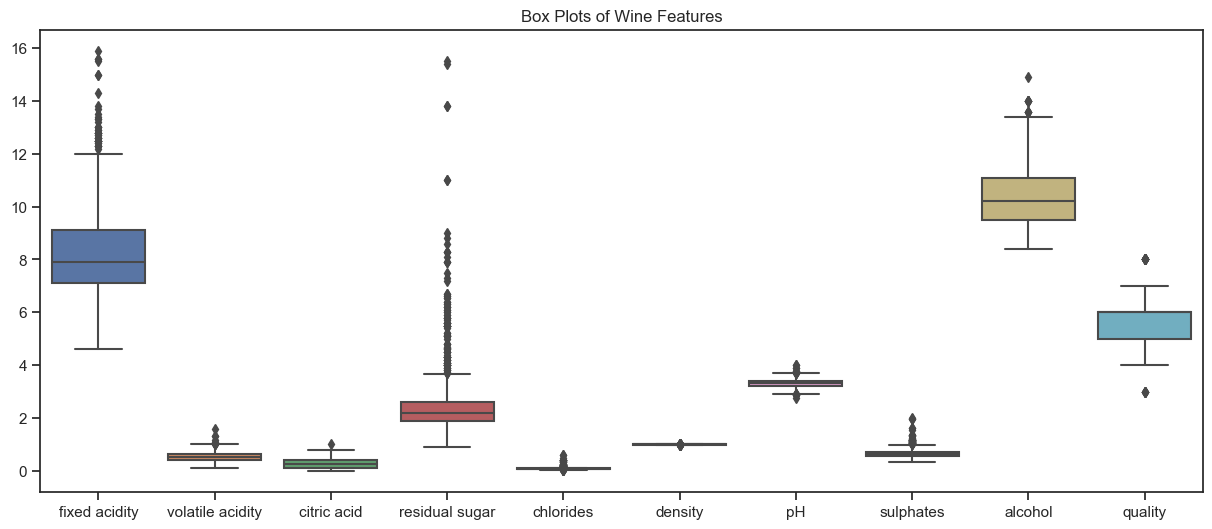

In [104]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=wine_data.drop(['Id', 'total sulfur dioxide', 'free sulfur dioxide'], axis=1))
plt.title('Box Plots of Wine Features')

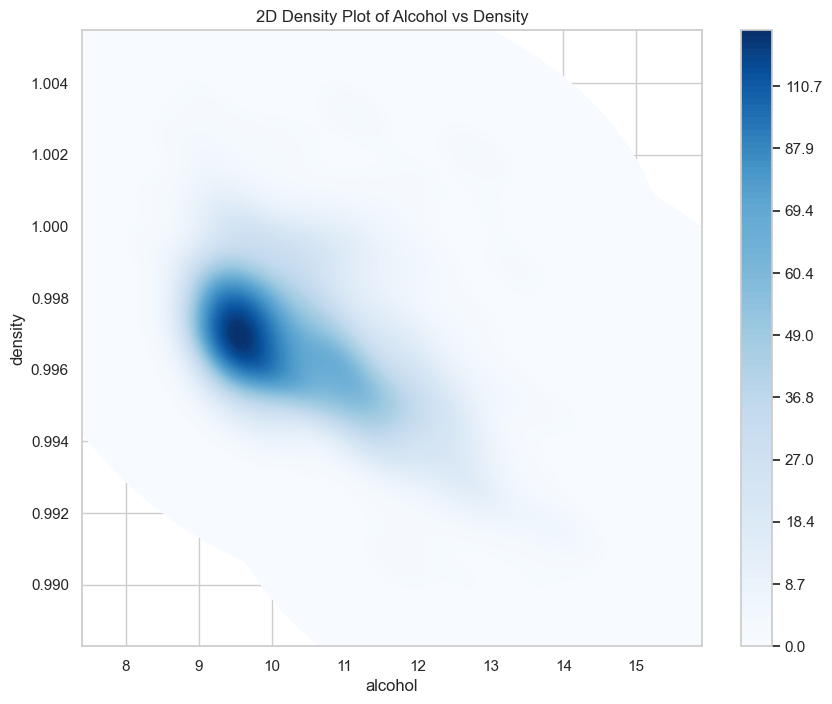

In [111]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x='alcohol', y='density', data=wine_data, fill=True, cmap='Blues', thresh=0, levels=100, cbar=True)
plt.title('2D Density Plot of Alcohol vs Density')
plt.show()